In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [22]:
predictor = TimeSeriesPredictor.load('TemporalFusionTransformer')

In [23]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44,target
0,FR13,2019-12-30,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0,7663.0
1,FR13,2020-01-06,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0,2917.0
2,FR13,2020-01-13,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0,2341.0
3,FR13,2020-01-20,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0,3853.0
4,FR13,2020-01-27,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0,82251.0


In [24]:
# Move 'target' column to the 4 position
cols = list(df.columns)
cols = cols[:2] + cols[-1:] + cols[2:-1]
df = df[cols]

# Show the first 5 rows
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [25]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']

In [26]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6976744186046512
0.3023255813953488


In [27]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target   ACT01  ACT03  ACT04  ACT07  ACT09  ACT13   ACT15  \
item_id timestamp                                                               
IT01    2019-12-30  7613.0  1228.0   87.0    0.0  195.0  188.0   32.0  1817.0   
        2020-01-06   390.0    87.0   63.0    0.0    5.0    8.0    0.0     0.0   
        2020-01-13   702.0   161.0   10.0    0.0   14.0    0.0   49.0     1.0   
        2020-01-20   941.0   437.0  143.0    0.0   86.0   67.0  110.0     0.0   
        2020-01-27  1470.0   403.0  457.0    0.0  178.0  108.0   48.0     7.0   

                     ACT17   ACT32  ACT44  
item_id timestamp                          
IT01    2019-12-30  1255.0  2811.0    0.0  
        2020-01-06     0.0   227.0    0.0  
        2020-01-13     0.0   467.0    0.0  
        2020-01-20     0.0    98.0    0.0  
        2020-01-27     0.0   269.0    0.0

In [28]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target  ACT01  ACT03  ACT04  ACT07  ACT09  ACT13  ACT15  \
item_id timestamp                                                             
IT01    2022-05-02  4074.0  788.0   29.0    0.0  396.0   30.0  111.0  515.0   
        2022-05-09   756.0  137.0    0.0    0.0  124.0    0.0    0.0    0.0   
        2022-05-16   439.0  153.0   27.0    0.0   76.0    2.0   24.0    0.0   
        2022-05-23  2078.0  452.0   28.0    0.0  387.0   57.0  158.0  506.0   
        2022-05-30  3883.0  912.0  198.0    0.0  514.0  178.0  261.0   14.0   

                    ACT17   ACT32  ACT44  
item_id timestamp                         
IT01    2022-05-02  145.0  2060.0    0.0  
        2022-05-09    0.0   495.0    0.0  
        2022-05-16    0.0   157.0    0.0  
        2022-05-23  138.0   352.0    0.0  
        2022-05-30   10.0  1796.0    0.0

In [29]:
# Make prediction on training data
predictions = predictor.predict(train_data, random_seed=42, model="TemporalFusionTransformer\\eb7eb3c8")
predictions.head()

data with frequency 'None' has been resampled to frequency 'W-MON'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
IT01    2022-05-02  4060.991211  3215.882812  3743.015137  4150.502930   
        2022-05-09   398.300903   -10.292969  -138.002441   129.750977   
        2022-05-16   582.582275   -13.589844    10.437256   407.414185   
        2022-05-23   985.903687   415.303833   719.823608   995.340332   
        2022-05-30  4143.916016  2761.564209  3637.020020  3559.415039   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
IT01    2022-05-02  4275.022949  4060.991211  4169.366699  4447.088867   
        2022-05-09   493.525635   398.300903   473.989014   811.362061   
        2022-05-16   600.395874   582.582275   891.224854  1053.071533   
        2022-05-23   983.599487   985.903687  1204.947632  1297.553955   
        2022-05-30  3967.740723  4143.916016  4136.762207  4477.135254   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-05-02  4613.831543  4388.032227  
        2022-05-09  1021.865723  1079.927246  
        2022-05-16  1094.350220  1227.486938  
        2022-05-23  1383.684814  1541.659180  
        2022-05-30  4604.348633  4766.291992

In [30]:
predictor.leaderboard(test_data)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,TemporalFusionTransformer\29b78c6b,-0.143218,-0.538773,0.062431,0.022325,18783.216242,4
1,WeightedEnsemble,-0.155409,-0.499259,0.240689,0.132992,2.523845,5
2,TemporalFusionTransformer\761537f1,-0.243509,-0.561396,0.059595,0.043957,7090.265935,3
3,TemporalFusionTransformer\9ae2dec6,-0.277100,-0.569448,0.051111,0.035004,1723.242944,1
4,TemporalFusionTransformer\eb7eb3c8,-0.377796,-0.564354,0.064551,0.031706,7255.747069,2


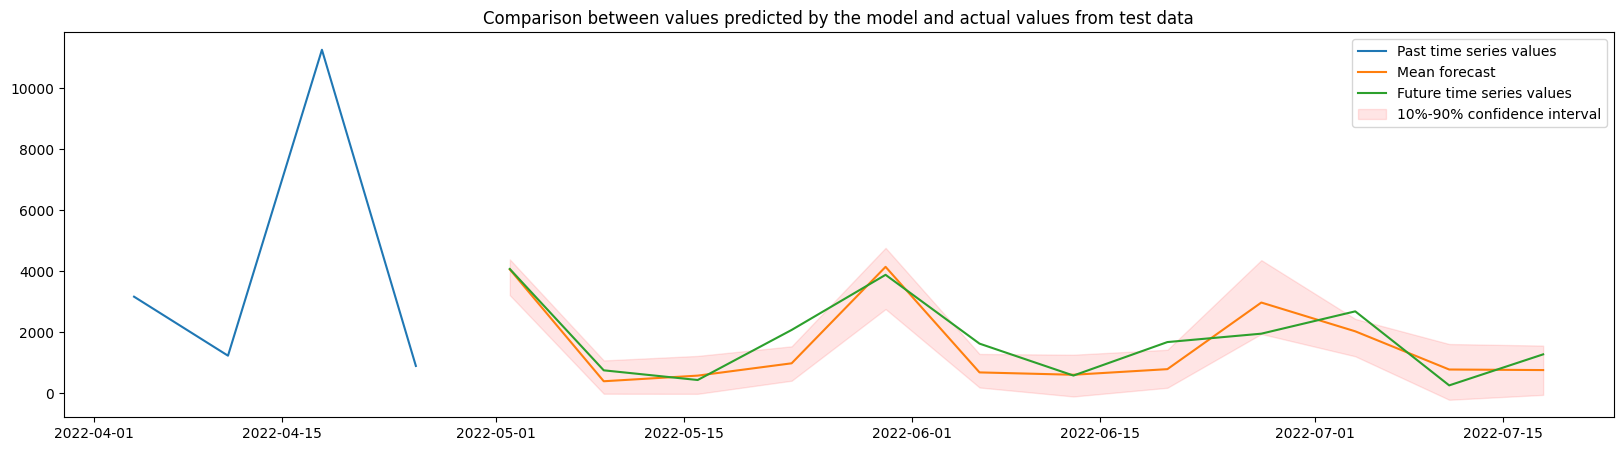

In [31]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data")

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

plt.plot(y_past[-4:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [32]:
# Sum all value of mean forecast of predictions where item_id is IT01
predictions.loc['IT01']['mean'].sum()

18820.865

In [33]:
# Sum all value of target of test_data 
test_data.loc['IT01']['target'][:12].sum()

21311.0

In [34]:
# Print first 12 rows of test_data
test_data.loc['IT01']['target'][:12]

timestamp
2022-05-02    4074.0
2022-05-09     756.0
2022-05-16     439.0
2022-05-23    2078.0
2022-05-30    3883.0
2022-06-06    1630.0
2022-06-13     585.0
2022-06-20    1681.0
2022-06-27    1956.0
2022-07-04    2687.0
2022-07-11     263.0
2022-07-18    1279.0
Name: target, dtype: float64

In [35]:
# Calculate difference betweend each prediction and actual value of test_data
diff = predictions.loc['IT01']['mean'] - test_data.loc['IT01']['target'][:12]
diff

timestamp
2022-05-02     -13.008789
2022-05-09    -357.699097
2022-05-16     143.582275
2022-05-23   -1092.096313
2022-05-30     260.916016
2022-06-06    -941.967407
2022-06-13      25.815186
2022-06-20    -886.450928
2022-06-27    1019.446045
2022-07-04    -654.067627
2022-07-11     519.802002
2022-07-18    -514.405518
dtype: float64

In [36]:
# Show model names
predictor.model_names()

['TemporalFusionTransformer\\9ae2dec6',
 'TemporalFusionTransformer\\eb7eb3c8',
 'TemporalFusionTransformer\\761537f1',
 'TemporalFusionTransformer\\29b78c6b',
 'WeightedEnsemble']

In [37]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\eb7eb3c8")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 8,
 'dropout_rate': 0.17973684761326877,
 'max_epochs': 150,
 'batch_size': 64,
 'lr': 0.0001}

In [38]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\9ae2dec6")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 32,
 'num_heads': 2,
 'dropout_rate': 0.1,
 'max_epochs': 100,
 'batch_size': 64,
 'lr': 0.01}

In [39]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\761537f1")  # provide the model name here
model.get_user_params()

{'hidden_dim': 128,
 'variable_dim': 32,
 'num_heads': 4,
 'dropout_rate': 0.3964687732560638,
 'max_epochs': 150,
 'batch_size': 128,
 'lr': 0.0001}

In [40]:
# Show parameters of the model
model = predictor._trainer.load_model("TemporalFusionTransformer\\29b78c6b")  # provide the model name here
model.get_user_params()

{'hidden_dim': 32,
 'variable_dim': 128,
 'num_heads': 4,
 'dropout_rate': 0.6831324655873079,
 'max_epochs': 200,
 'batch_size': 256,
 'lr': 0.01}